### Task Specification:

1. **Convert the Image to Two Dimensions (samples and three features):**
   - The image should be reshaped so that each row corresponds to a pixel and each row should have three features (presumably the RGB values of the pixel).<br><br>

2. **Compute the k Centroids:**
   - Use the K-means algorithm to compute the k cluster centroids, where k is a pre-specified number of clusters.<br><br>

3. **For Each Pixel (feature), Assign its Values to its Cluster:**
   - For each pixel in the image, calculate the Euclidean distance to each of the k cluster centroids. Assign the pixel to the cluster whose centroid is closest to it. The value of the pixel should be updated to be the value of its cluster centroid.<br><br>

4. **Reshape the Matrix to its Original Form and Display:**
   - After all pixels have been assigned to clusters and their values have been updated to be their respective cluster centroids, reshape this matrix back to the original shape of the image and display the result.<br><br>

5. **(The last steps have been implemented for you...)**


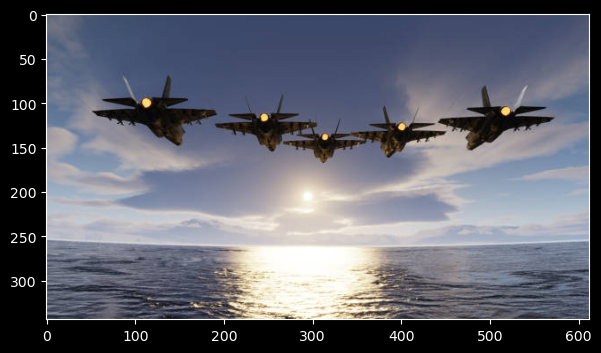

In [35]:

from matplotlib import pyplot as plt
import requests
import numpy as np
import cv2

# URL of the image to download
image_url = 'https://cdn.pixabay.com/photo/2014/08/15/11/29/beach-418742_640.jpg'
image_url = 'https://media.istockphoto.com/id/1342421368/photo/modern-bright-office-space.jpg?s=612x612&w=0&k=20&c=bI4-2ilaPc_gsHe0QcYM3cVIjqsprETTvk5PVQ--BDA='
image_url = 'https://media.istockphoto.com/id/1198339126/photo/f35-jets-flypast-formation-over-the-ocean-low-attitude-flying-3d-render.jpg?s=612x612&w=0&k=20&c=jsALknHYB8zrX7DtfvGifJuwrEm8N9DmTZInh-6Bxm0='

# Send a GET request to the URL
response = requests.get(image_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Get the content of the response
    image_data = response.content

    # Convert the image data to a NumPy array
    nparr = np.frombuffer(image_data, np.uint8)

    # Decode the image array using OpenCV
    image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

    desired_width = 426
    desired_height = 320

    desired_width, desired_height = image.shape[1]//2, image.shape[0]//2    
    # Downsample the image
    # image = cv2.resize(image, (desired_width, desired_height))

    # Display the image
    plt.figure(figsize=(7,7))
    plt.imshow(image[:,:,::-1])
    plt.show()
    
else:
    print('Failed to download the image. Status code:', response.status_code)


In [36]:
img = image.reshape(-1,3)
img.shape

(210528, 3)

In [40]:
K = 15

In [48]:
from scipy.spatial import distance
import tqdm

centroids = img[np.random.randint(0,len(img),size=K)]

for _ in range(40):
    # Assigmnemt step
    labels = distance.cdist(img, centroids).argmin(1)
    # Update step
    centroids = [img[labels==c].mean(0).round() if c in labels else centroids[c]
                  for c in range(K)]


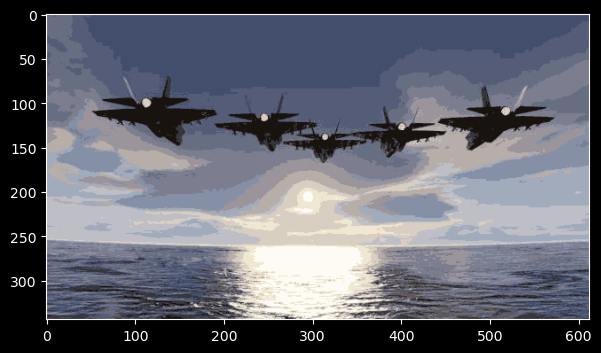

In [49]:
centroids = np.array(centroids)
# Map each pixel to its corresponding cluster center
segmented_image = centroids[labels]

# Reshape the segmented image back to its original shape
segmented_image = segmented_image.reshape(image.shape).astype(int)


# Display the original and segmented images
plt.figure(figsize=(7,7))
plt.imshow(segmented_image[:,:,::-1])
plt.show()

In [47]:
np.bincount(labels)

array([16370,  8926, 22059,  8261, 16781, 13025,  5991, 11942,  8141,
       12184, 17576, 10317, 11746, 25530, 21679])